# Import des données



In [413]:
import pandas as pd

In [414]:
df = pd.read_csv("allocine_forrest_avis.csv")

# Inspection des données

In [415]:
df.head()
df.shape
df.info()
df.isnull().sum()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Note             2009 non-null   object
 1   Description      2009 non-null   object
 2   Date             2009 non-null   object
 3   nombre_good_bad  2009 non-null   object
 4   nombre_follow    2009 non-null   object
 5   key              2009 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 94.3+ KB


,Note,Description,Date,nombre_good_bad,nombre_follow,key
count,2009,2009,2009,2009,2009,2009.000000
unique,10,2002,1484,78,1,NaN
top,"5,0","Beau, triste, émouvant, joyeux, magique et env...",Publiée le 29 septembre 2006,0\n \n\n \n\n \n \n ...,Suivre son activité,NaN
freq,1440,2,63,1494,2009,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.698855
std,NaN,NaN,NaN,NaN,NaN,4.172620
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,7.000000
75%,NaN,NaN,NaN,NaN,NaN,10.000000


In [416]:
df.head()

,Note,Description,Date,nombre_good_bad,nombre_follow,key
0,"5,0",Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,155\n \n\n \n\n \n \n ...,Suivre son activité,0
1,"4,5",Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,42\n \n\n \n\n \n \n ...,Suivre son activité,1
2,"5,0","Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,39\n \n\n \n\n \n \n ...,Suivre son activité,2
3,"5,0","Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,46\n \n\n \n\n \n \n ...,Suivre son activité,3
4,"5,0",Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,28\n \n\n \n\n \n \n ...,Suivre son activité,4


In [417]:
# Note à mettre en float
# Nous avons qu'une seule note --> 5
# Date à convertir
# split nb good et bad en 2 colonnes
# key inutile car même que indice
# nombre_follow inutile car même donnée pour toutes les lignes

# Préparation de la donnée

## Suppression des colonnes key et nombre_follow

In [418]:
df.pop("key")
df.pop("nombre_follow")

0       Suivre son activité
1       Suivre son activité
2       Suivre son activité
3       Suivre son activité
4       Suivre son activité
               ...         
2004    Suivre son activité
2005    Suivre son activité
2006    Suivre son activité
2007    Suivre son activité
2008    Suivre son activité
Name: nombre_follow, Length: 2009, dtype: object

In [419]:
df.head()

,Note,Description,Date,nombre_good_bad
0,"5,0",Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,155\n \n\n \n\n \n \n ...
1,"4,5",Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,42\n \n\n \n\n \n \n ...
2,"5,0","Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,39\n \n\n \n\n \n \n ...
3,"5,0","Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,46\n \n\n \n\n \n \n ...
4,"5,0",Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,28\n \n\n \n\n \n \n ...


## Conversion df["Note"] en float

In [420]:
for i in df["Note"]:
  df["Note"] = i.replace(",", ".")

In [421]:
df["Note"]
type(df["Note"][0])

str

## Conversion de la date

In [422]:
from datetime import datetime

In [423]:
df.head()

,Note,Description,Date,nombre_good_bad
0,5.0,Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,155\n \n\n \n\n \n \n ...
1,5.0,Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,42\n \n\n \n\n \n \n ...
2,5.0,"Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,39\n \n\n \n\n \n \n ...
3,5.0,"Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,46\n \n\n \n\n \n \n ...
4,5.0,Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,28\n \n\n \n\n \n \n ...


## Division de la colonne nombre_good_bad en deux

In [424]:
df2 = df.copy()
df2["good"] = ""
df2["bad"] = ""

In [425]:
df2["nombre_good_bad"][5].split(" ")[0]

'23\n'

In [426]:
for k in range(len(df)):
  numbers = []
  df2["nombre_good_bad"][k] = df2["nombre_good_bad"][k].split(" ")
  df2["good"][k] = df2["nombre_good_bad"][k][0]
  df2["bad"][k] = df2["nombre_good_bad"][k][-1]

In [427]:
# Cleaning de la colonne "good"
for i in df2["good"]:
  liste = i.split("\n")
  df2["good"] = liste[0] 

In [428]:
df2.head()

,Note,Description,Date,nombre_good_bad,good,bad
0,5.0,Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,"[155\n, , , , , , , , \n\n, , , , \n\n, , , , ...",155,10
1,5.0,Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,"[42\n, , , , , , , , \n\n, , , , \n\n, , , , \...",155,3
2,5.0,"Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,"[39\n, , , , , , , , \n\n, , , , \n\n, , , , \...",155,4
3,5.0,"Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,"[46\n, , , , , , , , \n\n, , , , \n\n, , , , \...",155,5
4,5.0,Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,"[28\n, , , , , , , , \n\n, , , , \n\n, , , , \...",155,3


## Supression de la colonne nombre_good_bad

In [429]:
df2.pop("nombre_good_bad")

0       [155\n, , , , , , , , \n\n, , , , \n\n, , , , ...
1       [42\n, , , , , , , , \n\n, , , , \n\n, , , , \...
2       [39\n, , , , , , , , \n\n, , , , \n\n, , , , \...
3       [46\n, , , , , , , , \n\n, , , , \n\n, , , , \...
4       [28\n, , , , , , , , \n\n, , , , \n\n, , , , \...
                              ...                        
2004    [0\n, , , , , , , , \n\n, , , , \n\n, , , , \n...
2005    [0\n, , , , , , , , \n\n, , , , \n\n, , , , \n...
2006    [0\n, , , , , , , , \n\n, , , , \n\n, , , , \n...
2007    [0\n, , , , , , , , \n\n, , , , \n\n, , , , \n...
2008    [0\n, , , , , , , , \n\n, , , , \n\n, , , , \n...
Name: nombre_good_bad, Length: 2009, dtype: object

In [430]:
df2.head()

,Note,Description,Date,good,bad
0,5.0,Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,155,10
1,5.0,Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,155,3
2,5.0,"Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,155,4
3,5.0,"Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,155,5
4,5.0,Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,155,3


In [431]:
df3 = df2.copy()

# Prédiction

## Variable cible binaire

In [432]:
df3.head()

,Note,Description,Date,good,bad
0,5.0,Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,155,10
1,5.0,Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,155,3
2,5.0,"Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,155,4
3,5.0,"Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,155,5
4,5.0,Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,155,3


In [433]:
df3["Note"].unique()

array(['5.0'], dtype=object)

In [434]:
#Construction de la variable Target "Note".
# Ici les notes ne sont pas variées. La variable cible binaire n'a pas de sens.
df3["Cible"] = df3.Note.apply(lambda x: 1 if float(x) > 2.5 else 0)

In [435]:
df3.head()

,Note,Description,Date,good,bad,Cible
0,5.0,Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,155,10,1
1,5.0,Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,155,3,1
2,5.0,"Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,155,4,1
3,5.0,"Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,155,5,1
4,5.0,Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,155,3,1


## Pre-processing



### Tokenisation

In [436]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [437]:
df3["Description"] = df3["Description"].apply(lambda x : nltk.word_tokenize(x))

In [438]:
df3["Description"]

0       [Forrest, Gump, de, Robert, Zemeckis, (, réali...
1       [Une, immense, rèussite, du, cinèma, hollywood...
2       [Le, matin, ,, quand, il, fait, bon, et, beau,...
3       [Un, film, immense, ,, rempli, de, poésie, et,...
4       [Un, très, grand, film, ., Ce, film, suit, la,...
                              ...                        
2004    [Ce, film, est, un, chef, d'œuvre, j'ai, adoré...
2005    [Meilleur, film, de, tous, les, temps, ., Acte...
2006    [Ce, film, est, bouleversant, ., Même, après, ...
2007    [Ce, film, est, un, classique, ., Très, toucha...
2008    [Il, s'agit, là, d'un, incontournable, !, Forr...
Name: Description, Length: 2009, dtype: object

### Suppression des stop-words

In [439]:
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS

In [440]:
stopwords = STOP_WORDS
len(stopwords)

600

In [441]:
df3["Description"] = df3["Description"].apply(lambda x: [token for token in x if token not in stopwords])

In [442]:
df3["Description"]

0       [Forrest, Gump, Robert, Zemeckis, (, réalisate...
1       [Une, immense, rèussite, cinèma, hollywoodien,...
2       [Le, matin, ,, bon, ,, normal, ,, j'aime, bala...
3       [Un, film, immense, ,, rempli, poésie, bons, s...
4       [Un, grand, film, ., Ce, film, vie, décennie, ...
                              ...                        
2004    [Ce, film, chef, d'œuvre, j'ai, adoré, vraimen...
2005    [Meilleur, film, temps, ., Acteurs, géniaux, c...
2006    [Ce, film, bouleversant, ., Même, l'avoir, foi...
2007            [Ce, film, classique, ., Très, réfléchir]
2008    [Il, s'agit, d'un, incontournable, !, Forrest,...
Name: Description, Length: 2009, dtype: object

### Suppression de la ponctuation

In [443]:
for k in range(len(df2)):
  for i in df2["Description"][k]:
    punct = [".", ",", ")", "(", "!", "?", ":", ";"]
    if i in punct:
      df2["Description"][k] = df2["Description"][k].remove(i)

#Pas réussie

AttributeError: ignored

### Lemming

In [448]:
from nltk.stem  import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [449]:
lemmatizer = WordNetLemmatizer()

In [450]:
df3["Description"] = df3.Description.apply(lambda x: lemmatizer.lemmatize(" ".join(x)))

In [451]:
df3["Description"]

0       F o r r e s t   G u m p   R o b e r t   Z e m ...
1       U n e   i m m e n s e   r è u s s i t e   c i ...
2       L e   m a t i n   ,   b o n   ,   n o r m a l ...
3       U n   f i l m   i m m e n s e   ,   r e m p l ...
4       U n   g r a n d   f i l m   .   C e   f i l m ...
                              ...                        
2004    C e   f i l m   c h e f   d ' œ u v r e   j ' ...
2005    M e i l l e u r   f i l m   t e m p s   .   A ...
2006    C e   f i l m   b o u l e v e r s a n t   .   ...
2007    C e   f i l m   c l a s s i q u e   .   T r è ...
2008    I l   s ' a g i t   d ' u n   i n c o n t o u ...
Name: Description, Length: 2009, dtype: object

### Variable cible continue

In [452]:
negatifs_words = ['ne', 'n\'', 'pas', 'plus', 'jamais', 'guère', 'nul', 'na', 'ni', 'mais', 'rien']
positif_words = [x for x in stopwords if x not in negatifs_words]

In [453]:
len(stopwords)
len(positif_words)

591

In [454]:
df3["Positif"] = df.Description.apply(lambda x: 0 if x.lower() in negatifs_words else 1)

In [455]:
df3.head()

,Note,Description,Date,good,bad,Cible,Positif
0,5.0,F o r r e s t G u m p R o b e r t Z e m ...,Publiée le 8 avril 2013,155,10,1,1
1,5.0,U n e i m m e n s e r è u s s i t e c i ...,Publiée le 25 juillet 2019,155,3,1,1
2,5.0,"L e m a t i n , b o n , n o r m a l ...",Publiée le 18 juillet 2014,155,4,1,1
3,5.0,"U n f i l m i m m e n s e , r e m p l ...",Publiée le 13 juin 2010,155,5,1,1
4,5.0,U n g r a n d f i l m . C e f i l m ...,Publiée le 18 août 2014,155,3,1,1


In [456]:
df3["Positif"].unique()
# A priori, il y a cohérence entre les notes élevées et les termes du commentaire.

array([1])

# Modélisation 1 : La note

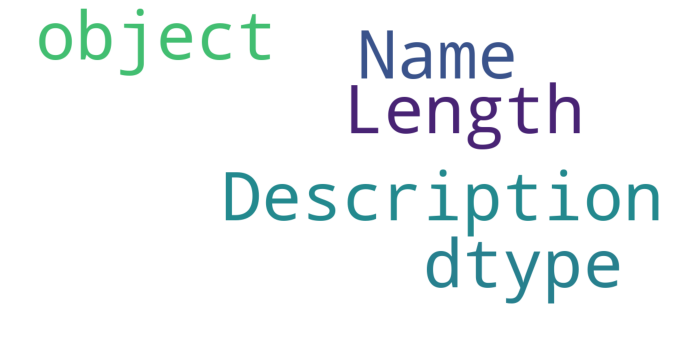

In [457]:
cloud = df

from wordcloud import WordCloud
import matplotlib.pyplot as plt


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations = False,
        background_color='white',
        stopwords=stopwords,
        max_words=10,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df3["Description"])

In [462]:
df3["Description"]

0       F o r r e s t   G u m p   R o b e r t   Z e m ...
1       U n e   i m m e n s e   r è u s s i t e   c i ...
2       L e   m a t i n   ,   b o n   ,   n o r m a l ...
3       U n   f i l m   i m m e n s e   ,   r e m p l ...
4       U n   g r a n d   f i l m   .   C e   f i l m ...
                              ...                        
2004    C e   f i l m   c h e f   d ' œ u v r e   j ' ...
2005    M e i l l e u r   f i l m   t e m p s   .   A ...
2006    C e   f i l m   b o u l e v e r s a n t   .   ...
2007    C e   f i l m   c l a s s i q u e   .   T r è ...
2008    I l   s ' a g i t   d ' u n   i n c o n t o u ...
Name: Description, Length: 2009, dtype: object

In [458]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [459]:
vectorizer = TfidfVectorizer()

In [ ]:
liste_de_mots = [" ".join(mot) for mot in df3["Description"]]
mots_frequents = vectorizer.fit_transform(df3["Description"]).toDense()

## Régression logistique

In [ ]:
# Pour la prédiction binaire nous choisirons la régression logistique.